<a href="https://colab.research.google.com/github/calldrj/COVID19.DataMining/blob/master/Psy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Import libraries, load and inspect datasets

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df_train = pd.read_csv('survey/dataset_psycology_survey.csv')
df_pred_ = pd.read_csv('survey/submission_psycology_survey.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### 1.1. Submission Dataset

In [2]:
print('Submission dataset has {} rows and {} columns'.\
      format(df_pred_.shape[0], df_pred_.shape[1]))
df_pred_.sample(5)

Submission dataset has 40 rows and 150 columns


,Unnamed: 0,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,...,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
18,18,5.0,1.0,3.0,3.0,4.0,4.0,4.0,5.0,5.0,3.0,4.0,4.0,3.0,4.0,5.0,1.0,4.0,4.0,1.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,2.0,5.0,3.0,5.0,4.0,3.0,2.0,5.0,1.0,5.0,...,5.0,5.0,2.0,5.0,5.0,4.0,3.0,3.0,4.0,3.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,3.0,5.0,few hours a day,1.0,5.0,5.0,5.0,5.0,5,17.0,175.0,60.0,2.0,male,right handed,secondary school,no,village,house
25,25,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,4.0,5.0,5.0,1.0,2.0,3.0,1.0,1.0,1.0,5.0,3.0,3.0,5.0,1.0,2.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,3.0,5.0,5.0,4.0,5.0,5.0,5.0,...,1.0,3.0,3.0,2.0,2.0,2.0,5.0,5.0,5.0,4.0,3.0,5.0,5.0,1.0,5.0,3.0,4.0,4.0,2.0,1.0,3.0,5.0,1.0,few hours a day,5.0,1.0,5.0,4.0,3.0,5,22.0,188.0,80.0,2.0,male,right handed,secondary school,no,city,block of flats
19,19,5.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,5.0,4.0,1.0,1.0,3.0,4.0,4.0,4.0,2.0,1.0,1.0,4.0,1.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,4.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,3.0,5.0,3.0,2.0,2.0,1.0,4.0,4.0,4.0,4.0,1.0,3.0,5.0,4.0,4.0,4.0,4.0,3.0,5.0,5.0,1.0,2.0,3.0,less than an hour a day,3.0,1.0,1.0,4.0,1.0,1,22.0,160.0,65.0,1.0,female,right handed,masters degree,no,city,house/bungalow
26,26,5.0,4.0,2.0,1.0,1.0,2.0,3.0,5.0,3.0,1.0,1.0,5.0,4.0,1.0,1.0,4.0,1.0,4.0,1.0,5.0,4.0,4.0,5.0,3.0,4.0,2.0,3.0,3.0,3.0,1.0,5.0,2.0,3.0,3.0,3.0,3.0,4.0,4.0,3.0,...,1.0,4.0,4.0,4.0,3.0,2.0,4.0,3.0,4.0,5.0,4.0,2.0,3.0,1.0,3.0,5.0,5.0,3.0,4.0,5.0,3.0,2.0,2.0,few hours a day,3.0,1.0,2.0,2.0,2.0,2,23.0,174.0,60.0,1.0,male,right handed,secondary school,no,city,block of flats
23,23,5.0,4.0,3.0,1.0,1.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,2.0,2.0,1.0,1.0,4.0,3.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,5.0,5.0,4.0,2.0,3.0,1.0,3.0,1.0,3.0,2.0,3.0,3.0,2.0,...,3.0,4.0,2.0,5.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0,3.0,4.0,3.0,4.0,5.0,4.0,4.0,2.0,2.0,4.0,4.0,4.0,few hours a day,2.0,3.0,1.0,2.0,5.0,3,21.0,179.0,96.0,0.0,male,right handed,secondary school,yes,city,block of flats


#### 1.2. Training Dataset

In [3]:
print('Training dataset has {} rows and {} columns'.format(df_train.shape[0], df_train.shape[1]))
print('\n' + '* ' * 40)
print(df_train.head())

Training dataset has 970 rows and 150 columns

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
   Music  Slow songs or fast songs  ...  Village - town  House - block of flats
0    5.0                       3.0  ...         village          block of flats
1    4.0                       4.0  ...            city          block of flats
2    5.0                       5.0  ...            city          block of flats
3    5.0                       3.0  ...            city                   house
4    5.0                       3.0  ...         village          house/bungalow

[5 rows x 150 columns]


#### 1.3. Find the target column by mismatching columns between 2 datasets

In [4]:
train_pred = [x for x in df_train.columns if x not in df_pred_.columns]
pred_train = [x for x in df_pred_.columns if x not in df_train.columns]
print(train_pred)
print(pred_train)

['Spending on healthy eating']
['Unnamed: 0']


#### 1.4. Select 35 relevant features for the target
The task of the problem is to predict how a person will rate the quote,      
**"I will hapilly pay more money for good, quality or healthy food."**       
in a scale from 1 to 5 in which 1 is strongly disagree, and 5 is strongly agree,     
given serveral of the individual rating on the other quotes (features).    
We picked 35 features out of 150 that we think they are relevant to the task.

In [5]:
# List of selected features indice in the training dataframe
features_idx = [38,39,44,49,50,53,54,55,56,57,58,61,73,74,
                75,93,95,101,112,123,124,126,132,133,134,
                135,136,137,138,140,141,142,143,144,146]
features = [df_train.columns.to_list()[k] for k in features_idx]
print(len(features), 'features are selected:\n')
print(features)

35 features are selected:

['Economy Management', 'Biology', 'Medicine', 'Countryside, outdoors', 'Dancing', 'Passive sport', 'Active sport', 'Gardening', 'Celebrities', 'Shopping', 'Science and technology', 'Adrenaline sports', 'Smoking', 'Alcohol', 'Healthy eating', 'Hypochondria', 'Eating to survive', 'Health', 'Appearence and gestures', 'Happiness in life', 'Energy levels', 'Personality', 'Internet usage', 'Finances', 'Shopping centres', 'Branded clothing', 'Entertainment spending', 'Spending on looks', 'Spending on gadgets', 'Age', 'Height', 'Weight', 'Number of siblings', 'Gender', 'Education']


### 2. Perform EDA for Both Training and Submission Sets at Once

In [6]:
# Separate categorical features and numerical features for data cleaning
  ## Categorical features
categorical_features = [f for f in features if df_train[f].dtype == 'object']
print(len(categorical_features), 'categorical features:')
print(categorical_features)
  ## Numerical features
numerical_features   = [f for f in features if df_train[f].dtype in ['int64', 'float64']]
print('\n', len(numerical_features), 'numerical features:')
print(numerical_features)

5 categorical features:
['Smoking', 'Alcohol', 'Internet usage', 'Gender', 'Education']

 30 numerical features:
['Economy Management', 'Biology', 'Medicine', 'Countryside, outdoors', 'Dancing', 'Passive sport', 'Active sport', 'Gardening', 'Celebrities', 'Shopping', 'Science and technology', 'Adrenaline sports', 'Healthy eating', 'Hypochondria', 'Eating to survive', 'Health', 'Appearence and gestures', 'Happiness in life', 'Energy levels', 'Personality', 'Finances', 'Shopping centres', 'Branded clothing', 'Entertainment spending', 'Spending on looks', 'Spending on gadgets', 'Age', 'Height', 'Weight', 'Number of siblings']


#### 2.1. Clean and Process Categorical Features

In [7]:
# Check for number of missing values in each of categorical features of: 
  ## Training set
for f in categorical_features:
  print('\n' + '* ' * 20)
  print(df_train[f].value_counts(dropna=False))
    
print('\n' + '* ' * 30)
  ## Submission set
for f in categorical_features:
  print('\n' + '* ' * 20)
  print(df_pred_[f].value_counts(dropna=False))


* * * * * * * * * * * * * * * * * * * * 
tried smoking     413
never smoked      200
current smoker    182
former smoker     169
NaN                 6
Name: Smoking, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
social drinker    636
drink a lot       212
never             118
NaN                 4
Name: Alcohol, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
few hours a day            714
less than an hour a day    134
most of the day            119
no time at all               3
Name: Internet usage, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
female    571
male      393
NaN         6
Name: Gender, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
secondary school                    540
college/bachelor degree             204
primary school                       78
masters degree                       65
secondary schools                    56
MS                                   12
currently a primary school pupil     10
doctorate degree            

In [8]:
# Fill missing data with the most frequent value in each features on:
for f in categorical_features:
  ## Training set
  c = df_train[f].value_counts()
  df_train[f].fillna(c[c == c.iloc[0]].index.to_list()[0], inplace=True)

  ## Submission set
  d = df_pred_[f].value_counts()
  df_pred_[f].fillna(d[d == d.iloc[0]].index.to_list()[0], inplace=True)

In [9]:
# Recount values and check for missing values in each features on:
  ## Training set
for f in categorical_features:
  print('\n' + '* ' * 20)
  print(df_train[f].value_counts(dropna=False))

  ## Submission set
print('\n' + '* ' * 30)
for f in categorical_features:
  print('\n' + '* ' * 20)
  print(df_pred_[f].value_counts(dropna=False))


* * * * * * * * * * * * * * * * * * * * 
tried smoking     419
never smoked      200
current smoker    182
former smoker     169
Name: Smoking, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
social drinker    640
drink a lot       212
never             118
Name: Alcohol, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
few hours a day            714
less than an hour a day    134
most of the day            119
no time at all               3
Name: Internet usage, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
female    577
male      393
Name: Gender, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
secondary school                    541
college/bachelor degree             204
primary school                       78
masters degree                       65
secondary schools                    56
MS                                   12
currently a primary school pupil     10
doctorate degree                      4
Name: Education, dtype: int64

* * * * * * * *

> ### ** A Delicate Treatment for Order of Values in a Feature **
> #### If the target, **"I will happily pay more money for good, quality or healthy food."** ranks values "Strongly Disagree" = 1 and "Strong Agree" = 5, we cannot randomly assign the values in "Smoking" and "Alcohol". 
> #### These values must be placed in orders in line with the ranking of the target because it is more likely a person who never smokes, never drinks strongly agrees to buy healthy food than a person who is a chronic smoker.
> #### We will have the same treatment when dealing  with numerical feature later. For exapmple, **"I eat because I have to. I don't enjoy food and eat as fast as I can."** has values "Strongly Disagree" = 1 and "Strong Agreed" = 5. Its order has conflicted effects on that of the target. A person who eats as fast as he/she can or eat less likely pays more for good, quality food. The order of this feature need to be reversed.
> #### We'll show more treatments in processing numerical data below. These instances prove that data science is not about coding but also **critical thinking** and **data curiosity**.


In [10]:
# Rank the categorical values in feature 'Smoking' then decode those values
smoke = ['current smoker', 'former smoker', 'tried smoking', 'never smoked']
f = lambda x: smoke.index(x) + 1

df_train['Smoking'] = df_train['Smoking'].apply(f)
df_pred_['Smoking'] = df_pred_['Smoking'].apply(f)

In [11]:
# Rank the categorical values in feature 'Alcohol' then decode those values
drink = ['drink a lot', 'social drinker', 'never']
f = lambda x: drink.index(x) + 1

df_train['Alcohol'] = df_train['Alcohol'].apply(f)
df_pred_['Alcohol'] = df_pred_['Alcohol'].apply(f)

In [12]:
# Rank the categorical values in feature 'Internet usage' then decode those values
internet = ['no time at all', 'less than an hour a day', 
            'few hours a day', 'most of the day']
f = lambda x: internet.index(x) + 1

df_train['Internet usage'] = df_train['Internet usage'].apply(f)
df_pred_['Internet usage'] = df_pred_['Internet usage'].apply(f)

In [13]:
# Partition the values in feature 'Education' in 2 groups: 
# college for 1 and non-college degrees for 0
degrees = ['college/bachelor degree', 'masters degree', 'MS', 'doctorate degree']
f = lambda e: 1 if e in degrees else 0

df_train['Education'] = df_train['Education'].apply(f)
df_pred_['Education'] = df_pred_['Education'].apply(f)

In [14]:
# Assign value of feature 'Gender' 0 for female and 1 for male
f = lambda x: 0 if x == 'female' else 1

df_train['Gender'] = df_train['Gender'].apply(f)
df_pred_['Gender'] = df_pred_['Gender'].apply(f)

In [15]:
# Recount values / check for NaN in categorical features on:
    ## Training set
for f in categorical_features:
  print('\n' + '* ' * 20)
  print(df_train[f].value_counts(dropna=False))

print('\n' + '* ' * 30)
    
    ## Submission set
for f in categorical_features:
  print('\n' + '* ' * 20)
  print(df_pred_[f].value_counts(dropna=False))


* * * * * * * * * * * * * * * * * * * * 
3    419
4    200
1    182
2    169
Name: Smoking, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
2    640
1    212
3    118
Name: Alcohol, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
3    714
2    134
4    119
1      3
Name: Internet usage, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
0    577
1    393
Name: Gender, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
0    685
1    285
Name: Education, dtype: int64

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

* * * * * * * * * * * * * * * * * * * * 
3    19
4     8
1     7
2     6
Name: Smoking, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
2    24
1    10
3     6
Name: Alcohol, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
3    30
4     5
2     5
Name: Internet usage, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
0    22
1    18
Name: Gender, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
0    27
1    13
Name:

#### 2.2. Clean and Process Numerical Features

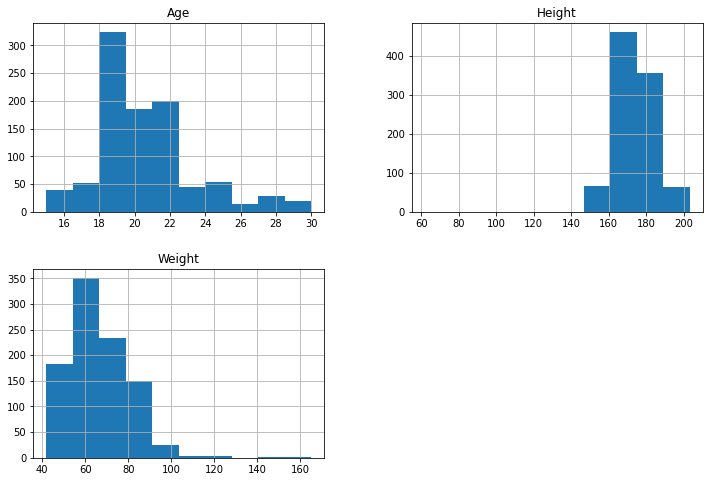

<function matplotlib.pyplot.show>

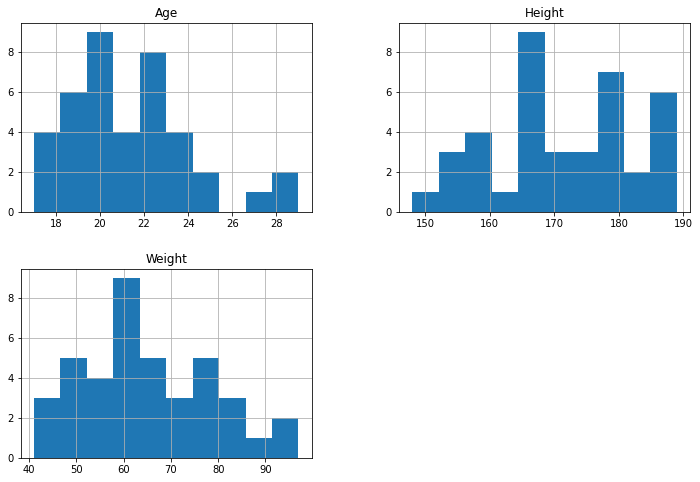

In [16]:
# Inspect and compare the distribution of continuous numerical features in:
c = ['Height', 'Weight', 'Age']

  ## Training set
df_train[c].hist(figsize=(12,8))
plt.show()

  ## Submission set
df_pred_[c].hist(figsize=(12,8))
plt.show

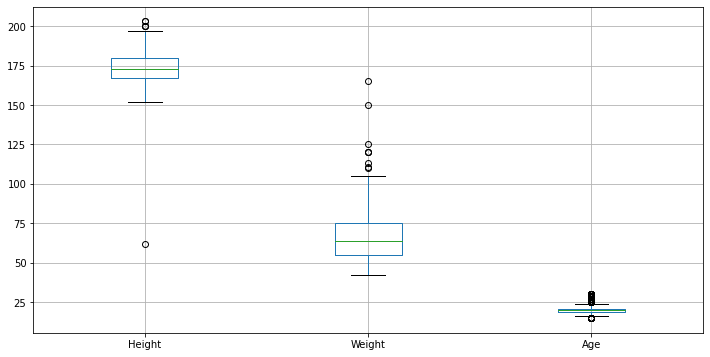

<function matplotlib.pyplot.show>

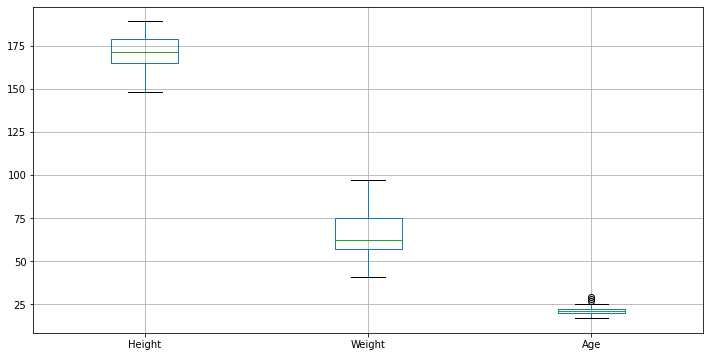

In [17]:
# Plot boxplot to detect outliners of numerical features on:
  ## Training set
df_train[c].boxplot(figsize=(12,6))
plt.show()

  ## Submission set
df_pred_[c].boxplot(figsize=(12,6))
plt.show

> ##### The Height's range in Submission set is  (125cm,  200cm)
> ##### The Weight's range in Submission set is  not higher than 100kg
> ##### Hence anything in the Training outside these ranges is to be removed.
> ##### It is a tactical move for this particular task of the project because 
> ##### the testing set has been revealed in the submission.csv file. 
> ##### In practice, we should remove outliners of any dataset with great care 
> ##### and domain knowledge because we will not have the like of the submission dataset.

In [18]:
removed_idx = []
# over_height defined by Height of anyone > 200cm
over_height = df_train[c][df_train.Height > 200]
removed_idx.extend(over_height.index.to_list())
print(over_height)

# under_height defined by Height of anyone < 125cm
under_height = df_train[c][df_train.Height < 125]
removed_idx.extend(under_height.index.to_list())
print(under_height)

# over_weight defined by Weight of anyone > 110kg
over_weight = df_train[c][df_train.Weight > 110]
removed_idx.extend(over_weight.index.to_list())
print(over_weight)

print('\nRows with following indices need to be removed:')
print(removed_idx)

     Height  Weight   Age
523   203.0    80.0  21.0
764   203.0    89.0  18.0
     Height  Weight   Age
646    62.0    55.0  20.0
     Height  Weight   Age
283   184.0   120.0  21.0
683   183.0   111.0  29.0
758   185.0   120.0  24.0
761   189.0   113.0  27.0
823   190.0   125.0  20.0
849     NaN   165.0  23.0
933   175.0   120.0  20.0
952   200.0   150.0  30.0

Rows with following indices need to be removed:
[523, 764, 646, 283, 683, 758, 761, 823, 849, 933, 952]


In [19]:
# Remove rows with outliners of Height and Weight in Training set
df_train.drop(index=removed_idx, inplace=True)
df_train.reset_index(drop=True, inplace=True)

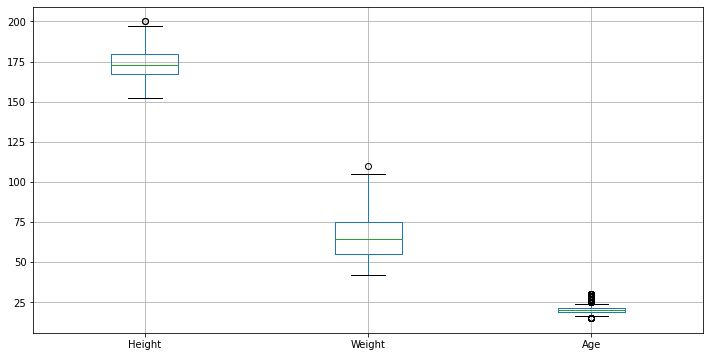

<function matplotlib.pyplot.show>

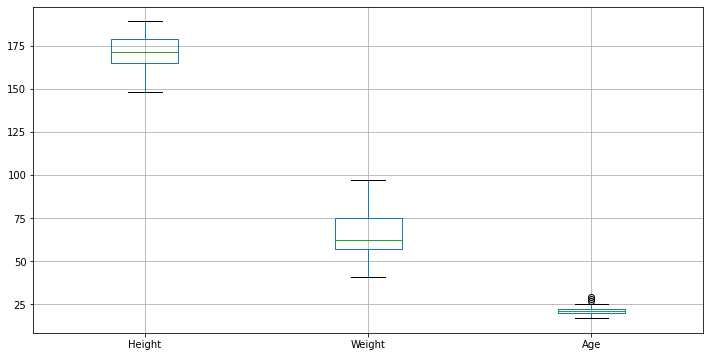

In [20]:
# Plot boxplot to detect outliners of numerical features on:
  ## Training set
df_train[c].boxplot(figsize=(12,6))
plt.show()

  ## Submission set
df_pred_[c].boxplot(figsize=(12,6))
plt.show

In [21]:
# Fill in missing numerical values
for f in c:
  df_train[f] = df_train[f].fillna(df_train[f].median())
  df_pred_[f] = df_pred_[f].fillna(df_pred_[f].median())

In [22]:
# Count values of the discrete numerical features and check for missing values in:
d = [f for f in features if f not in c]

  ## Training set
for f in d:
  print('\n' + '* ' * 20)
  print(df_train[f].value_counts(dropna=False))

print('\n' + '* ' * 30)
  ## Submission set
for f in d:
  print('\n' + '* ' * 20)
  print(df_pred_[f].value_counts(dropna=False))


* * * * * * * * * * * * * * * * * * * * 
1.0    250
2.0    227
3.0    207
4.0    154
5.0    116
NaN      5
Name: Economy Management, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
2.0    262
1.0    238
3.0    191
5.0    150
4.0    113
NaN      5
Name: Biology, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
1.0    292
2.0    235
3.0    204
5.0    142
4.0     82
NaN      4
Name: Medicine, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
5.0    293
4.0    286
3.0    212
2.0    102
1.0     60
NaN      6
Name: Countryside, outdoors, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
1.0    359
2.0    183
3.0    167
5.0    146
4.0    102
NaN      2
Name: Dancing, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
5.0    295
3.0    215
4.0    171
2.0    141
1.0    122
NaN     15
Name: Passive sport, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
5.0    303
3.0    186
1.0    184
4.0    164
2.0    119
NaN      3
Name: Active sport, dtype: int64

* * * * * 

In [23]:
# Fill missing values in each numerical features with its median
for f in d:
  df_train[f] = df_train[f].fillna(df_train[f].median())
  df_pred_[f] = df_pred_[f].fillna(df_pred_[f].median())

# Double check for more missing values in both datasets
print(df_train[features].isnull().sum())
print('\n' + '* ' * 20)
print(df_pred_[features].isnull().sum())

Economy Management         0
Biology                    0
Medicine                   0
Countryside, outdoors      0
Dancing                    0
Passive sport              0
Active sport               0
Gardening                  0
Celebrities                0
Shopping                   0
Science and technology     0
Adrenaline sports          0
Smoking                    0
Alcohol                    0
Healthy eating             0
Hypochondria               0
Eating to survive          0
Health                     0
Appearence and gestures    0
Happiness in life          0
Energy levels              0
Personality                0
Internet usage             0
Finances                   0
Shopping centres           0
Branded clothing           0
Entertainment spending     0
Spending on looks          0
Spending on gadgets        0
Age                        0
Height                     0
Weight                     0
Number of siblings         0
Gender                     0
Education     

### **Reverse the Orders of Features that Conflict with that of the Target**

In [24]:
# Reverse function
f = lambda x: 6 - x
rev_features = ['Eating to survive', 'Branded clothing', 
                'Entertainment spending', 'Spending on gadgets', 'Finances']
for r in rev_features:
  # On Training set
  df_train[r] = df_train[r].apply(f)
  # On Submission set
  df_pred_[r] = df_pred_[r].apply(f)

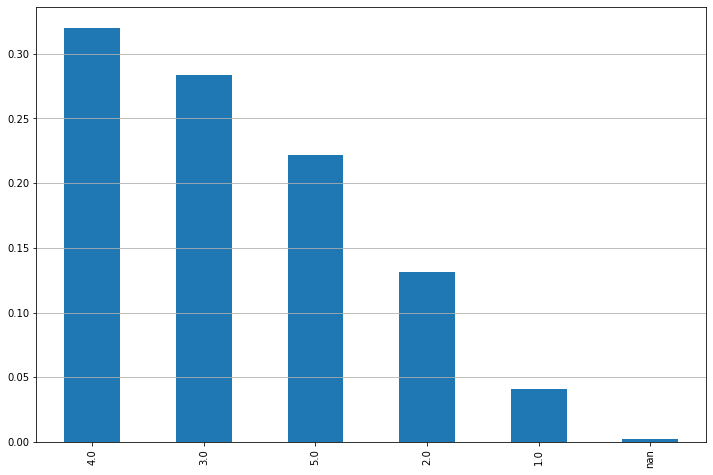

4.0    307
3.0    272
5.0    213
2.0    126
1.0     39
Name: Spending on healthy eating, dtype: int64


In [25]:
# Check for missing values in the target
y = df_train['Spending on healthy eating']
s = y.value_counts(dropna=False, normalize=True)
s.plot(kind='bar', figsize=(12,8))
plt.grid(axis='y')
plt.show()
print(y.value_counts())

### There is a great deal of imbalance in target class:
> #### Class 1 accounts only for < 4% of total Traing set of 957 data points.
> #### Class 2 accounts for < 14% of a whole Traing set.
> #### This imblance causes a major problem for the model's performances discussed later.
> #### We cannot affort to fill 2 msissing values in target by the most domminant class as we did on previous process of numerical features. In addiction, we do not  have information to convince that 2 data points with missing values on their target belong to either class 1 or class 2. 
> #### So the best strategy is to drop them without a guilt!
### **Drop them like a rock!**

In [26]:
removed_idx = df_train[y.isnull()].index.to_list()
df_train.drop(index=removed_idx, inplace=True)
df_train.reset_index(drop=True, inplace=True)

### **Merge class 1 into class 2:**
> #### This may be a controversial issue. But we beg you to think this way:
> #### (1) Is there much difference between "Strongly Disagree" and "Disagree,"  given the quote,   
> ### **"I will happily pay more money for good, quality or healthy food."**?
> #### (2) Is it worth to sacrify class 1 for its absence in the Training set to boost the overall model performances by 15%--given that the 100% correct predictions of class 1 only add less than 4% to the overall score?
> #### We hope the target's class 1 and class 2 in submission dataset has similar distribution as those in Training set. Otherwise, it is an unfair game, and we'll run for our money!

In [27]:
# Create a training set with selected features
X, y = df_train[features], df_train['Spending on healthy eating']
y = y.apply(lambda x: x - 2 if x > 2 else 0)
X_pred_ = df_pred_[features]

### Run a Chi-square test to find the top k features in the datasets
> #### **Trials and errors give the optimal k = 12**

In [28]:
from sklearn.feature_selection import SelectKBest, chi2
ch2 = SelectKBest(chi2, k=12)
ch2.fit(X, y)
top_k = ch2.get_support(indices=True)
print(top_k)

[ 0  4  6 10 11 14 16 17 25 26 27 28]


In [29]:
# Print out top 10 features in Training set
top_features = [features[t] for t in top_k]
print(top_features)

['Economy Management', 'Dancing', 'Active sport', 'Science and technology', 'Adrenaline sports', 'Healthy eating', 'Eating to survive', 'Health', 'Branded clothing', 'Entertainment spending', 'Spending on looks', 'Spending on gadgets']


> #### There is not much information gained from the pairplot. 
> #### However, it's obvious that the domimance of class 3 (previously 5) in target and the least visibility of the class 0 (previously 1 and 2).
> #### A ML model will learn too much about class 3, but too little about class 0, as a results, it will give predictions bias towards the dominant classes.

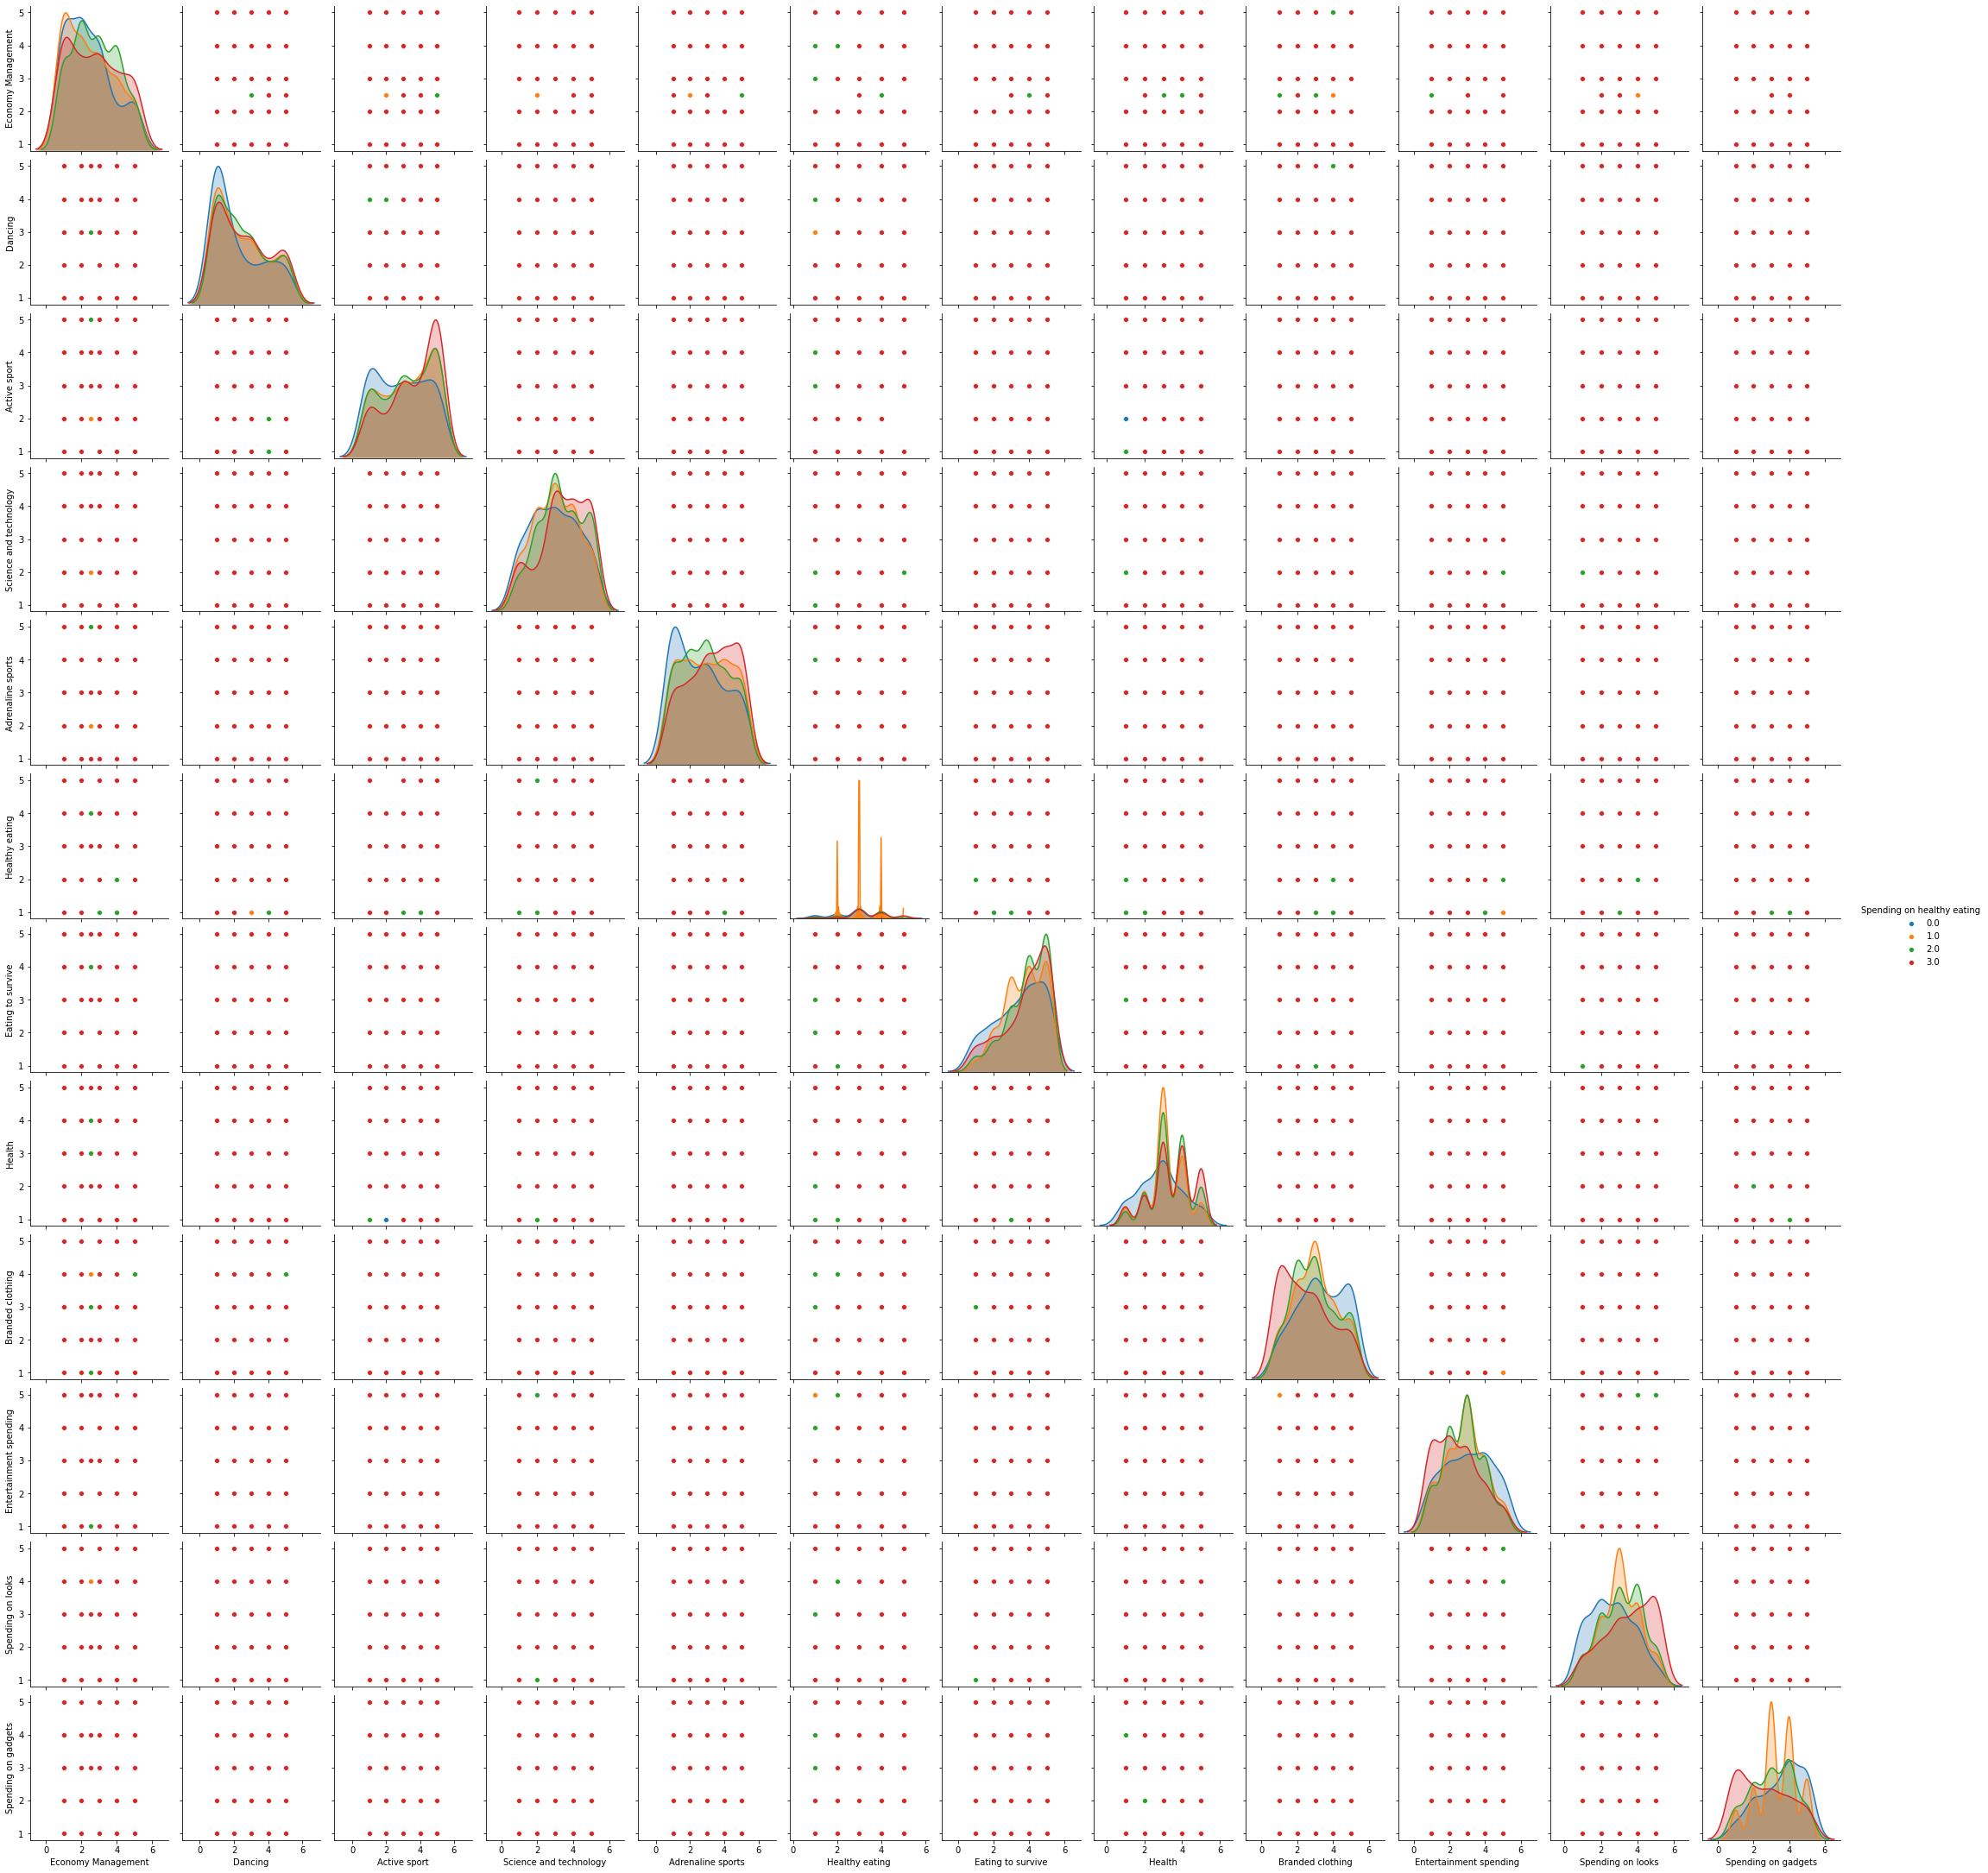

In [30]:
sns.pairplot(pd.concat([df_train[top_features], y], axis=1), 
             hue='Spending on healthy eating')
plt.show()

In [31]:
# Select a new dataframe with top k features from X
X = df_train[top_features]
print(X.shape, y.shape)
print('\n' + '* ' * 20)

# Double check target
print(y.value_counts())
print('\n' + '* ' * 20)
print('Total items in all class of target:', y.value_counts().sum())

(957, 12) (957,)

* * * * * * * * * * * * * * * * * * * * 
2.0    307
1.0    272
3.0    213
0.0    165
Name: Spending on healthy eating, dtype: int64

* * * * * * * * * * * * * * * * * * * * 
Total items in all class of target: 957


### **3. Train and Validate Baseline Models**
> #### **Asumptions:**
>> ### (1) Each of 5 classes in target are equally important. 
>> ### Hence, the probability (accuracy) of a random guessing is equal *X*. 
>> ### A model, therefore, scores  2 * X in accuracy, is considered a "good" model given the scope of a mini project? 
>> ### The only answer is the model's performances in the submission dataset. (But we may never know, perharps the TAs know!)   
>> ### (2) Again, the distributions of those classes in Training and Submission Sets are similar.    
#### **3.1. Set up Librabries and Helper Function**

In [32]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier as RFR
from sklearn.ensemble import ExtraTreesClassifier as ETC
from sklearn.ensemble import BaggingClassifier as BAG
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import AdaBoostClassifier as ADA
from sklearn.neural_network import MLPClassifier as ANN
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

def get_models():
    models = {}
    # Logistic Regression
    models['LGR'] = LGR()
    # Support Vector Classifier
    models['SVC'] = SVC(gamma='auto')
    # KNearest Neighbors Classifier
    models['KNN'] = KNN()
    # Bagging Classifier
    models['BAG'] = BAG()
    # Random Forest Classifier
    models['RFR'] = RFR()
    # Extra Trees Classifier
    models['ETC'] = ETC()
    # Ada Boost Classifier
    models['ADA'] = ADA()
    # Gradient Boost Classifier
    models['GBC'] = GBC()
    # Quadratic Discriminant Analysis
    models['QDA'] = QDA()
    # Neural Network
    models['ANN'] = ANN()
    return models

print('Setup OK. Ready for training!')
print(get_models())

Setup OK. Ready for training!
{'LGR': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), 'SVC': SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), 'KNN': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), 'BAG': BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=

> #### **3.2. Train, Cross Validate, and Compare Baseline Models**
> #### Taking advantages of free **GPU money on Google Cloud**, we use 20-fold cross validation. 
> #### Each fold mimics the quantity (and hopefully the quality) of the submission dataset. 
(But we may never know, perharps the TAs know!)

In [33]:
from sklearn.model_selection import cross_val_score as CVS
from sklearn.model_selection import cross_val_predict as CVP

# Generate a collection of baseline models
seed, models = 111, get_models()

# Input and output data for the model
X, y = np.array(X), np.array(y)

# Create accuracy score list and confusion matrix for model evaluation
model_accuracy, m = {}, len(np.unique(y))

n_folds = 20
# Train and evaluate the model
for name, model in models.items():
  acc, cfm = [], np.zeros((m,m))
  kf = KFold(n_splits=n_folds, shuffle=True, random_state=seed)
  acc = CVS(model, X, y, cv=kf, scoring='accuracy')
  y_pred = CVP(model, X, y, cv=kf)
  cfm = confusion_matrix(y, y_pred)
  model_accuracy[name] = acc
  print('Model\tAccuracy (Mean)\tAccuracy (STD)')
  print('{}\t{:.3f}\t\t{:.3f}'.format(name, np.mean(acc), np.std(acc)))
  print('\tConfusion Matrix:')
  print(cfm)
  print('\n' + '* ' * 15)

Model	Accuracy (Mean)	Accuracy (STD)
LGR	0.391		0.059
	Confusion Matrix:
[[ 43  62  50  10]
 [ 34  99 111  28]
 [ 29  67 158  53]
 [  5  46  88  74]]

* * * * * * * * * * * * * * * 
Model	Accuracy (Mean)	Accuracy (STD)
SVC	0.397		0.054
	Confusion Matrix:
[[ 34  72  47  12]
 [ 20 121 103  28]
 [ 16  96 152  43]
 [ 10  50  80  73]]

* * * * * * * * * * * * * * * 
Model	Accuracy (Mean)	Accuracy (STD)
KNN	0.363		0.064
	Confusion Matrix:
[[ 48  70  39   8]
 [ 37 128  94  13]
 [ 40 121 125  21]
 [ 17  72  78  46]]

* * * * * * * * * * * * * * * 
Model	Accuracy (Mean)	Accuracy (STD)
BAG	0.382		0.078
	Confusion Matrix:
[[ 49  54  51  11]
 [ 46 111  90  25]
 [ 38 101 124  44]
 [ 18  44  77  74]]

* * * * * * * * * * * * * * * 
Model	Accuracy (Mean)	Accuracy (STD)
RFR	0.387		0.076
	Confusion Matrix:
[[ 46  64  44  11]
 [ 33 118  93  28]
 [ 28  84 149  46]
 [  8  48  74  83]]

* * * * * * * * * * * * * * * 
Model	Accuracy (Mean)	Accuracy (STD)
ETC	0.403		0.079
	Confusion Matrix:
[[ 44  61  50  10

> #### **3.3. Visualize Accuracy Scores to Compare Models Performances**

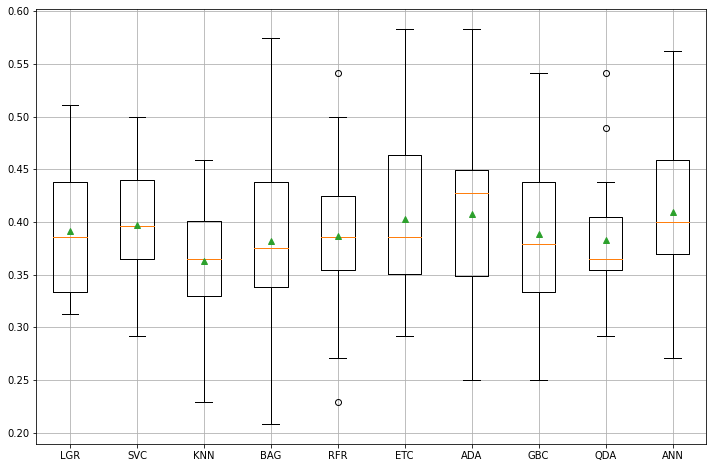

In [34]:
# Plot the accuracy scores
plt.boxplot(list(model_accuracy.values()), 
            labels=list(model_accuracy.keys()), showmeans=True)
plt.grid()
plt.gcf().set_size_inches(12,8)
plt.show()

### **4. Improve Model Performances by Stacking the Best Models**
> #### Model stacking **conceptually** works similiarly as a neuron network.
> #### A stacked model has two layers:
>> #### The first one in a ensemble of **baseline models** each of which is fed with Training set as inputs then predicts the target as those models above.
>> #### The ensemble should contain the best-performing models with different algorithm families to enhance their weaknesses for even better performances.
>> #### The second layer holds a single simple model (e.g. LGR) with decent performances that take the each of prediction set of the models in the first layer as a feature then computes the final prediction for the target.
> #### Model stacking, a normal tactic in Kaggle contests, does not always guantee better model performances. 
> #### If it does not indeed deliver the results, try other strategy (following discussion) or return to the baseline models.

In [35]:
from sklearn.ensemble import StackingClassifier

# Generate a collection of baseline models
seed, models = 111, get_models()

# Build a network of the selected models by stacking
hidden_layers = [('ADA', models['ADA']), 
                 ('SVC', models['SVC']),
                 ('ANN', models['ANN']),]
last_layer = models['LGR']
network = StackingClassifier(estimators=hidden_layers, final_estimator=last_layer)

# Create accuracy score list and confusion matrix for model evaluation
m = len(np.unique(y))
acc, cfm = [], np.zeros((m,m))

# Train and evaluate the model
kf = KFold(n_splits=n_folds, shuffle=True, random_state=seed)
acc = CVS(network, X, y, cv=kf, scoring='accuracy')
y_pred = CVP(network, X, y, cv=kf)
cfm = confusion_matrix(y, y_pred)
model_accuracy['NET'] = acc
print('Model\tAccuracy (Mean)\tAccuracy (STD)')
print('VOT\t{:.3f}\t\t{:.3f}'.format(np.mean(acc), np.std(acc)))
print('\tConfusion Matrix:')
print(cfm)
print('\n' + '* ' * 15)

Model	Accuracy (Mean)	Accuracy (STD)
VOT	0.405		0.063
	Confusion Matrix:
[[ 46  54  48  17]
 [ 32 102 113  25]
 [ 24  79 151  53]
 [ 11  35  84  83]]

* * * * * * * * * * * * * * * 


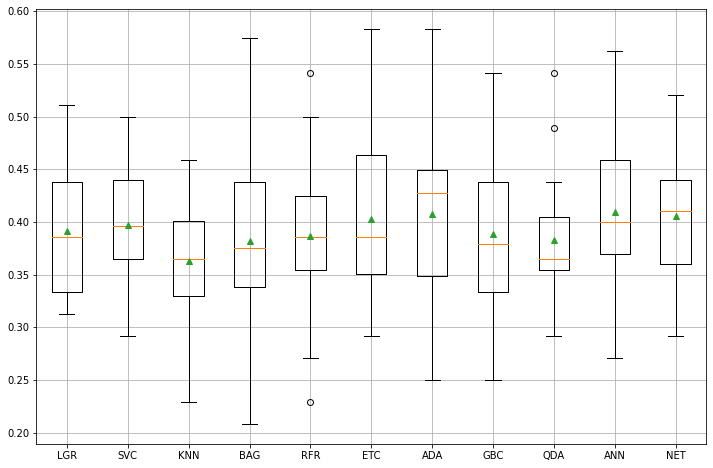

In [36]:
# Plot the accuracy scores
plt.boxplot(list(model_accuracy.values()), 
            labels=list(model_accuracy.keys()), showmeans=True)
plt.grid()
plt.gcf().set_size_inches(12,8)
plt.show()

### **5. Improve Model Performances by the Best Models' Voting**
> #### A **hard voting classifier** works by taking the predictions from an ensemble of models then assigns a value for each prediction with the majority vote that the models give.  
>#### It is useful for a collection of models to balance out their individual weaknesses.

In [37]:
from sklearn.ensemble import VotingClassifier

# Generate a collection of baseline models
seed, models = 111, get_models()

# Build a classifier of voting models
estimators = [('SVC', models['SVC']), 
              ('ADA', models['ADA']),
              ('LGR', models['LGR']),]

voters = VotingClassifier(estimators=estimators, voting='hard')

# Create accuracy score list and confusion matrix for model evaluation
m = len(np.unique(y))
acc, cfm = [], np.zeros((m,m))

# Train and evaluate the model
kf = KFold(n_splits=n_folds, shuffle=True, random_state=seed)
acc = CVS(voters, X, y, cv=kf, scoring='accuracy')
y_pred = CVP(voters, X, y, cv=kf)
cfm = confusion_matrix(y, y_pred)
model_accuracy['VOT'] = acc
print('Model\tAccuracy (Mean)\tAccuracy (STD)')
print('VOT\t{:.3f}\t\t{:.3f}'.format(np.mean(acc), np.std(acc)))
print('\tConfusion Matrix:')
print(cfm)
print('\n' + '* ' * 15)

Model	Accuracy (Mean)	Accuracy (STD)
VOT	0.404		0.072
	Confusion Matrix:
[[ 51  71  35   8]
 [ 40 111  98  23]
 [ 32  80 147  48]
 [ 18  46  72  77]]

* * * * * * * * * * * * * * * 


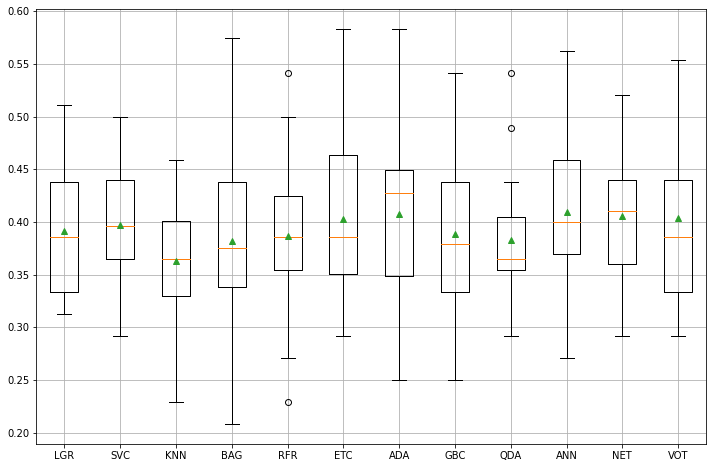

In [38]:
# Plot the accuracy scores
plt.boxplot(list(model_accuracy.values()), 
            labels=list(model_accuracy.keys()), showmeans=True)
plt.grid()
plt.gcf().set_size_inches(12,8)
plt.show()

### **6.1. Seclect Best-Performance Model for Prediction of the Submission Dataset**
> #### **Select model VOT to train with the dataset**

In [39]:
# Prepare the Training and Prediction datasets
y = df_train['Spending on healthy eating'].apply(lambda x: x - 2 if x > 2 else 0)
X, y = np.array(df_train[top_features]), np.array(y)
X_pred_ = np.array(df_pred_[top_features]) 

# Generate a collection of baseline models
models = get_models()

# Build a classifier of voting models
estimators = [('SVC', models['SVC']), 
              ('ADA', models['ADA']),
              ('LGR', models['LGR']),]

voters = VotingClassifier(estimators=estimators, voting='hard')

# Train with the whole Training set 
voters.fit(X, y)

# Predict the Submission Set
y_pred = voters.predict(X_pred_)

# Convert the predicted targets to original values
y_pred += 2

# Convert the target to a pandas series to paste into the submission.csv file
y_pred = pd.Series(y_pred, name='Prediction')


# Read the original submission.csv file
df_submission = pd.read_csv('survey/submission_psycology_survey.csv')

# Paste the prediction series into the submission dataframe
df_submission = pd.concat([df_submission, y_pred], axis=1)

# Save the submission file with the prediction column
file_to_save = 'survey/submission_prediction_psycology_survey.csv'
df_submission.to_csv(file_to_save, sep=',', index=False)

In [40]:
df_submission = pd.read_csv('survey/submission_prediction_psycology_survey.csv')
print(df_submission.Prediction.value_counts(normalize=True))
print(df_submission.shape)
print(df_submission)

4.0    0.500
3.0    0.225
5.0    0.175
2.0    0.100
Name: Prediction, dtype: float64
(40, 151)
    Unnamed: 0  Music  ...  House - block of flats  Prediction
0            0    5.0  ...          block of flats         4.0
1            1    5.0  ...          house/bungalow         4.0
2            2    5.0  ...          block of flats         2.0
3            3    5.0  ...          house/bungalow         4.0
4            4    5.0  ...                   house         4.0
5            5    5.0  ...          house/bungalow         4.0
6            6    5.0  ...          block of flats         4.0
7            7    5.0  ...                   house         4.0
8            8    5.0  ...          block of flats         4.0
9            9    5.0  ...          block of flats         4.0
10          10    5.0  ...          block of flats         5.0
11          11    5.0  ...          block of flats         3.0
12          12    5.0  ...          block of flats         4.0
13          13    5.0  